In [51]:

# data importing & processing
import os
import pandas as pd
from datetime import date

# dash & ploting
import dash
from dash import dcc, html, callback, Output, Input
from dash.dependencies import Input, Output
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.graph_objs as go

In [29]:
df = pd.read_csv("E:\Placement Prep\ML and DS\Data Science\Omdena\Local Chapters\Water Management & Forecasting - Algeria & Bhopal\Project\omdena_water_scarcity\datafiles\GLDAS-2.2\GLDAS_Bhopal_2010_2023.csv")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4929 entries, 0 to 4928
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               4929 non-null   object 
 1   city               4929 non-null   object 
 2   ACond_tavg         4929 non-null   float64
 3   AvgSurfT_tavg      4929 non-null   float64
 4   CanopInt_tavg      4929 non-null   float64
 5   ECanop_tavg        4929 non-null   float64
 6   ESoil_tavg         4929 non-null   float64
 7   EvapSnow_tavg      4929 non-null   float64
 8   Evap_tavg          4929 non-null   float64
 9   GWS_tavg           4929 non-null   float64
 10  Lwnet_tavg         4929 non-null   float64
 11  Qg_tavg            4929 non-null   float64
 12  Qh_tavg            4929 non-null   float64
 13  Qle_tavg           4929 non-null   float64
 14  Qsb_tavg           4929 non-null   float64
 15  Qsm_tavg           4929 non-null   float64
 16  Qs_tavg            4929 

In [31]:
df.head()

,date,city,ACond_tavg,AvgSurfT_tavg,CanopInt_tavg,ECanop_tavg,ESoil_tavg,EvapSnow_tavg,Evap_tavg,GWS_tavg,...,Qs_tavg,SnowDepth_tavg,SnowT_tavg,SoilMoist_P_tavg,SoilMoist_RZ_tavg,SoilMoist_S_tavg,SWE_tavg,Swnet_tavg,TVeg_tavg,TWS_tavg
0,10-01-01,Bhopal,0.010088,287.688380,0.001156,2.932935e-08,0.000012,0.0,0.000015,883.827648,...,0.000000e+00,0.0,287.688380,1172.228199,288.400510,5.566383,0.0,151.129770,0.000002,1172.229304
1,10-01-02,Bhopal,0.010061,289.268913,0.000401,2.920452e-09,0.000012,0.0,0.000015,883.432609,...,0.000000e+00,0.0,289.268913,1171.363238,287.930671,5.547952,0.0,145.878682,0.000002,1171.363680
2,10-01-03,Bhopal,0.010747,292.449339,0.000948,7.901975e-09,0.000014,0.0,0.000017,883.026668,...,3.507778e-10,0.0,292.449339,1170.347264,287.320660,5.488808,0.0,141.945173,0.000003,1170.348275
3,10-01-04,Bhopal,0.011983,289.668102,0.000724,1.918644e-08,0.000011,0.0,0.000013,882.605022,...,0.000000e+00,0.0,289.668102,1169.410008,286.805072,5.509292,0.0,146.034988,0.000002,1169.410822
4,10-01-05,Bhopal,0.010241,287.474046,0.000275,1.576623e-09,0.000011,0.0,0.000013,882.173136,...,0.000000e+00,0.0,287.474046,1168.653461,286.480318,5.510678,0.0,153.171961,0.000002,1168.653736


In [68]:
# sorting the dataframe on the basis of the date column
df = df.sort_values(by='date')
df.head()

,date,city,ACond_tavg,AvgSurfT_tavg,CanopInt_tavg,ECanop_tavg,ESoil_tavg,EvapSnow_tavg,Evap_tavg,GWS_tavg,...,Qs_tavg,SnowDepth_tavg,SnowT_tavg,SoilMoist_P_tavg,SoilMoist_RZ_tavg,SoilMoist_S_tavg,SWE_tavg,Swnet_tavg,TVeg_tavg,TWS_tavg
0,10-01-01,Bhopal,0.010088,287.688380,0.001156,2.932935e-08,0.000012,0.0,0.000015,883.827648,...,0.000000e+00,0.0,287.688380,1172.228199,288.400510,5.566383,0.0,151.129770,0.000002,1172.229304
1,10-01-02,Bhopal,0.010061,289.268913,0.000401,2.920452e-09,0.000012,0.0,0.000015,883.432609,...,0.000000e+00,0.0,289.268913,1171.363238,287.930671,5.547952,0.0,145.878682,0.000002,1171.363680
2,10-01-03,Bhopal,0.010747,292.449339,0.000948,7.901975e-09,0.000014,0.0,0.000017,883.026668,...,3.507778e-10,0.0,292.449339,1170.347264,287.320660,5.488808,0.0,141.945173,0.000003,1170.348275
3,10-01-04,Bhopal,0.011983,289.668102,0.000724,1.918644e-08,0.000011,0.0,0.000013,882.605022,...,0.000000e+00,0.0,289.668102,1169.410008,286.805072,5.509292,0.0,146.034988,0.000002,1169.410822
4,10-01-05,Bhopal,0.010241,287.474046,0.000275,1.576623e-09,0.000011,0.0,0.000013,882.173136,...,0.000000e+00,0.0,287.474046,1168.653461,286.480318,5.510678,0.0,153.171961,0.000002,1168.653736


In [69]:
df.tail()

,date,city,ACond_tavg,AvgSurfT_tavg,CanopInt_tavg,ECanop_tavg,ESoil_tavg,EvapSnow_tavg,Evap_tavg,GWS_tavg,...,Qs_tavg,SnowDepth_tavg,SnowT_tavg,SoilMoist_P_tavg,SoilMoist_RZ_tavg,SoilMoist_S_tavg,SWE_tavg,Swnet_tavg,TVeg_tavg,TWS_tavg
4924,23-06-26,Bhopal,0.014880,301.319386,0.010942,0.000002,0.000024,0.0,0.000028,821.132273,...,0.000004,0.0,301.319386,1119.148058,298.015849,6.533273,0.0,103.863962,0.000002,1119.159069
4925,23-06-27,Bhopal,0.016214,301.113478,0.010765,0.000002,0.000026,0.0,0.000030,822.014210,...,0.000018,0.0,301.113478,1123.364814,301.350545,6.898181,0.0,101.200953,0.000002,1123.375532
4926,23-06-28,Bhopal,0.016272,300.568071,0.012465,0.000002,0.000031,0.0,0.000037,823.678898,...,0.000053,0.0,300.568071,1134.990114,311.311238,7.512892,0.0,109.385402,0.000003,1135.002598
4927,23-06-29,Bhopal,0.017152,300.438963,0.012693,0.000002,0.000028,0.0,0.000034,826.473011,...,0.000030,0.0,300.438963,1144.042161,317.569183,7.319170,0.0,111.313468,0.000004,1144.054883
4928,23-06-30,Bhopal,0.016794,300.249694,0.013172,0.000002,0.000025,0.0,0.000032,829.937107,...,0.000008,0.0,300.249694,1151.335034,321.397936,7.022767,0.0,102.562258,0.000005,1151.348196


In [19]:
df['city'].unique()

array(['Bhopal'], dtype=object)

In [79]:
# taking only the parameters that are important for our analysis
imp_cols = ['date','Evap_tavg','GWS_tavg','Qsb_tavg','Qs_tavg','TWS_tavg']
# reading in the data and selecting the required columns
df1 = pd.read_csv('E:\Placement Prep\ML and DS\Data Science\Omdena\Local Chapters\Water Management & Forecasting - Algeria & Bhopal\Project\omdena_water_scarcity\datafiles\GLDAS-2.2\GLDAS_Bhopal_2010_2023.csv',usecols=imp_cols)
# getting the details of the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4929 entries, 0 to 4928
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       4929 non-null   object 
 1   Evap_tavg  4929 non-null   float64
 2   GWS_tavg   4929 non-null   float64
 3   Qsb_tavg   4929 non-null   float64
 4   Qs_tavg    4929 non-null   float64
 5   TWS_tavg   4929 non-null   float64
dtypes: float64(5), object(1)
memory usage: 231.2+ KB


In [80]:
df1.rename(columns={'Evap_tavg':'Avg. ET','GWS_tavg':'Avg. Gw Storage','Qsb_tavg':'Avg. Baseflow-Gw Runoff','Qs_tavg':'Avg. Storm Sw Runoff','TWS_tavg':'Avg. Terrestrial water storage'},inplace=True)
df1.head()

,date,Avg. ET,Avg. Gw Storage,Avg. Baseflow-Gw Runoff,Avg. Storm Sw Runoff,Avg. Terrestrial water storage
0,10-01-01,0.000015,883.827648,0.0,0.000000e+00,1172.229304
1,10-01-02,0.000015,883.432609,0.0,0.000000e+00,1171.363680
2,10-01-03,0.000017,883.026668,0.0,3.507778e-10,1170.348275
3,10-01-04,0.000013,882.605022,0.0,0.000000e+00,1169.410822
4,10-01-05,0.000013,882.173136,0.0,0.000000e+00,1168.653736


In [81]:
df1.describe()

,Avg. ET,Avg. Gw Storage,Avg. Baseflow-Gw Runoff,Avg. Storm Sw Runoff,Avg. Terrestrial water storage
count,4.929000e+03,4929.000000,4.929000e+03,4.929000e+03,4929.000000
mean,2.559726e-05,925.192461,3.375840e-09,1.322072e-05,1231.037906
std,1.537218e-05,103.145223,1.579577e-08,6.190646e-05,138.095511
min,9.759096e-07,772.309685,0.000000e+00,0.000000e+00,1041.838268
25%,1.345307e-05,841.604381,0.000000e+00,0.000000e+00,1116.926136
50%,2.291173e-05,904.001347,0.000000e+00,6.350355e-12,1201.042719
75%,3.669512e-05,986.725043,0.000000e+00,4.671041e-07,1312.837159
max,7.665411e-05,1224.835834,2.703296e-07,1.523734e-03,1658.060147


In [82]:
df1.isnull().sum()

date                              0
Avg. ET                           0
Avg. Gw Storage                   0
Avg. Baseflow-Gw Runoff           0
Avg. Storm Sw Runoff              0
Avg. Terrestrial water storage    0
dtype: int64

In [83]:
df_copy = df1.copy()
df_copy['date'] = pd.to_datetime(df_copy['date'])
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4929 entries, 0 to 4928
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            4929 non-null   datetime64[ns]
 1   Avg. ET                         4929 non-null   float64       
 2   Avg. Gw Storage                 4929 non-null   float64       
 3   Avg. Baseflow-Gw Runoff         4929 non-null   float64       
 4   Avg. Storm Sw Runoff            4929 non-null   float64       
 5   Avg. Terrestrial water storage  4929 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 231.2 KB


In [84]:
df_copy = df_copy.set_index('date')
df_copy.index

DatetimeIndex(['2001-10-01', '2002-10-01', '2003-10-01', '2004-10-01',
               '2005-10-01', '2006-10-01', '2007-10-01', '2008-10-01',
               '2009-10-01', '2010-10-01',
               ...
               '2021-06-23', '2022-06-23', '2023-06-23', '2024-06-23',
               '2025-06-23', '2026-06-23', '2027-06-23', '2028-06-23',
               '2029-06-23', '2030-06-23'],
              dtype='datetime64[ns]', name='date', length=4929, freq=None)

In [85]:
df_copy.head()

,Avg. ET,Avg. Gw Storage,Avg. Baseflow-Gw Runoff,Avg. Storm Sw Runoff,Avg. Terrestrial water storage
date,,,,,
2001-10-01,0.000015,883.827648,0.0,0.000000e+00,1172.229304
2002-10-01,0.000015,883.432609,0.0,0.000000e+00,1171.363680
2003-10-01,0.000017,883.026668,0.0,3.507778e-10,1170.348275
2004-10-01,0.000013,882.605022,0.0,0.000000e+00,1169.410822
2005-10-01,0.000013,882.173136,0.0,0.000000e+00,1168.653736


In [86]:
df_copy = df_copy.sort_index()

In [90]:
df_copy.head(20)

,Avg. ET,Avg. Gw Storage,Avg. Baseflow-Gw Runoff,Avg. Storm Sw Runoff,Avg. Terrestrial water storage
date,,,,,
2001-01-13,0.000018,922.662489,0.0,1.743104e-09,1215.305079
2001-01-14,0.000020,993.657471,0.0,2.062294e-08,1316.784202
2001-01-15,0.000010,904.859509,0.0,9.023708e-05,1217.332774
2001-01-16,0.000016,878.272992,0.0,0.000000e+00,1157.121611
2001-01-17,0.000022,940.644224,0.0,0.000000e+00,1240.079765
2001-01-18,0.000012,860.479980,0.0,0.000000e+00,1136.742797
2001-01-19,0.000015,904.324416,0.0,0.000000e+00,1193.062312
2001-01-20,0.000017,1011.182000,0.0,1.081067e-06,1344.752671
2001-01-21,0.000019,925.436731,0.0,0.000000e+00,1226.635311


In [71]:
df_copy.tail(20)

,Avg. ET,Avg. Gw Storage,Avg. Storm Sw Runoff,Avg. Terrestrial water storage
date,,,,
2011-06-23,0.000007,831.932071,2.227847e-12,1099.011886
2012-06-23,0.000007,831.067621,8.510064e-10,1098.177103
2013-06-23,0.000007,830.212187,8.981079e-11,1097.314460
2014-06-23,0.000006,829.365784,2.059761e-11,1096.429814
2015-06-23,0.000006,828.528941,0.000000e+00,1095.572260
2016-06-23,0.000006,827.701419,0.000000e+00,1094.695560
2017-06-23,0.000005,826.883078,2.176381e-10,1093.918551
2018-06-23,0.000006,826.072952,8.307068e-10,1093.240192
2019-06-23,0.000012,825.269120,7.112671e-09,1093.281615


In [89]:
df_copy.tail(20)

,Avg. ET,Avg. Gw Storage,Avg. Baseflow-Gw Runoff,Avg. Storm Sw Runoff,Avg. Terrestrial water storage
date,,,,,
2031-11-08,0.000053,1173.023608,4.642464e-08,3.711494e-05,1569.372999
2031-11-10,0.000045,1033.799167,0.000000e+00,0.000000e+00,1356.701084
2031-11-12,0.000018,921.256279,0.000000e+00,1.902798e-06,1215.421643
2031-12-01,0.000018,904.652501,0.000000e+00,1.883575e-09,1194.807213
2031-12-03,0.000012,853.783076,0.000000e+00,0.000000e+00,1122.362552
2031-12-05,0.000005,816.174128,0.000000e+00,0.000000e+00,1082.728178
2031-12-07,0.000023,928.117163,0.000000e+00,1.082707e-04,1303.767348
2031-12-08,0.000052,1133.763243,2.317460e-08,1.549452e-05,1517.109735
2031-12-10,0.000044,1027.208040,0.000000e+00,0.000000e+00,1348.521009


In [91]:
df_copy.shape

(4929, 5)

In [92]:
# counting the number of zero values
(df_copy==0).sum()

Avg. ET                              0
Avg. Gw Storage                      0
Avg. Baseflow-Gw Runoff           3940
Avg. Storm Sw Runoff              2311
Avg. Terrestrial water storage       0
dtype: int64

In [93]:
# counting the percentage of these zero values
((df_copy==0).sum()/len(df_copy))*100

Avg. ET                            0.000000
Avg. Gw Storage                    0.000000
Avg. Baseflow-Gw Runoff           79.935078
Avg. Storm Sw Runoff              46.885778
Avg. Terrestrial water storage     0.000000
dtype: float64

In [94]:
# Dropping Baseflow GW Runoff variable since consists of more than 50% of zero values
df_copy.drop(columns=['Avg. Baseflow-Gw Runoff'],inplace=True)
df_copy.head()

,Avg. ET,Avg. Gw Storage,Avg. Storm Sw Runoff,Avg. Terrestrial water storage
date,,,,
2001-01-13,0.000018,922.662489,1.743104e-09,1215.305079
2001-01-14,0.000020,993.657471,2.062294e-08,1316.784202
2001-01-15,0.000010,904.859509,9.023708e-05,1217.332774
2001-01-16,0.000016,878.272992,0.000000e+00,1157.121611
2001-01-17,0.000022,940.644224,0.000000e+00,1240.079765


In [122]:
df_copy['Avg. ET'].values

array([1.80764013e-05, 2.01621733e-05, 9.86255066e-06, ...,
       1.44959806e-05, 1.47339202e-05, 1.66336694e-05])

c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



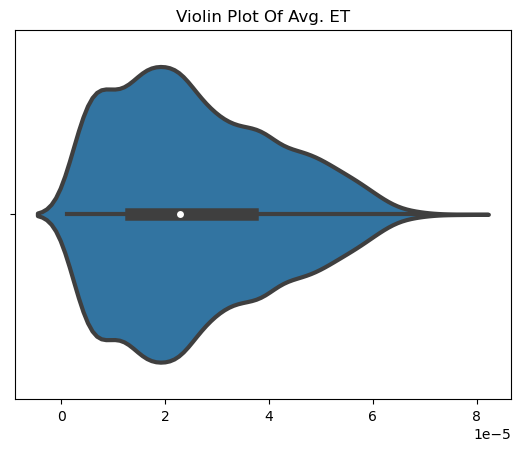

<Figure size 1000x600 with 0 Axes>

c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



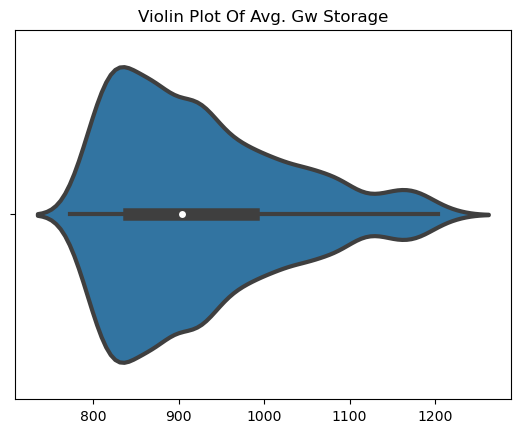

<Figure size 1000x600 with 0 Axes>

c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



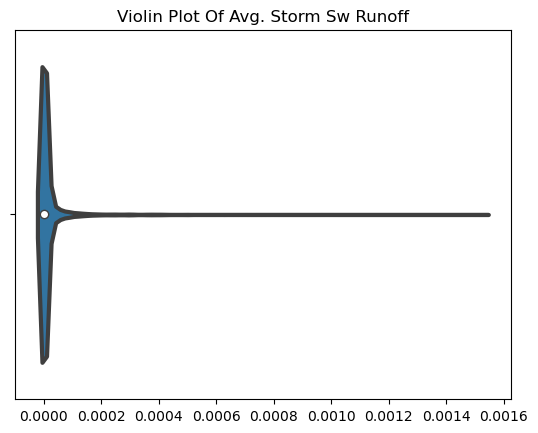

<Figure size 1000x600 with 0 Axes>

c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



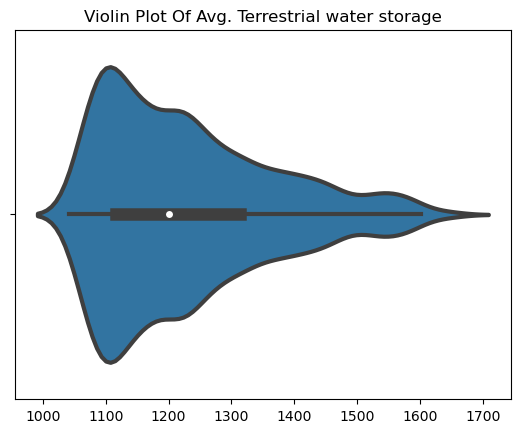

<Figure size 1000x600 with 0 Axes>

In [138]:
parameters = ['Avg. ET', 'Avg. Gw Storage','Avg. Storm Sw Runoff','Avg. Terrestrial water storage']
for param in parameters:
    sb.violinplot(df_copy[param].values,linewidth=3)
    plt.title(f'Violin Plot Of {param}')
    plt.figure(figsize=(10,6))
    plt.show()

In [120]:
# plotting the scatter plot of the remaining variables
fig = px.scatter_matrix(df_copy,
                        dimensions=['Avg. ET','Avg. Gw Storage','Avg. Storm Sw Runoff','Avg. Terrestrial water storage'],
                        title='Scatter plot of the Variables',
                        labels={'Avg. ET':'ET','Avg. Gw Storage':'GW St.','Avg. Storm Sw Runoff':'SW Flow','Avg. Terrestrial water storage':'Terrs. St.'},
                        template='plotly')
fig.show()

In [96]:
# Now Quantifying the relationships using the pearson correlation coefficient
df_copy.corr(method='pearson')

,Avg. ET,Avg. Gw Storage,Avg. Storm Sw Runoff,Avg. Terrestrial water storage
Avg. ET,1.000000,0.729803,0.047674,0.753587
Avg. Gw Storage,0.729803,1.000000,0.115687,0.990619
Avg. Storm Sw Runoff,0.047674,0.115687,1.000000,0.173844
Avg. Terrestrial water storage,0.753587,0.990619,0.173844,1.000000


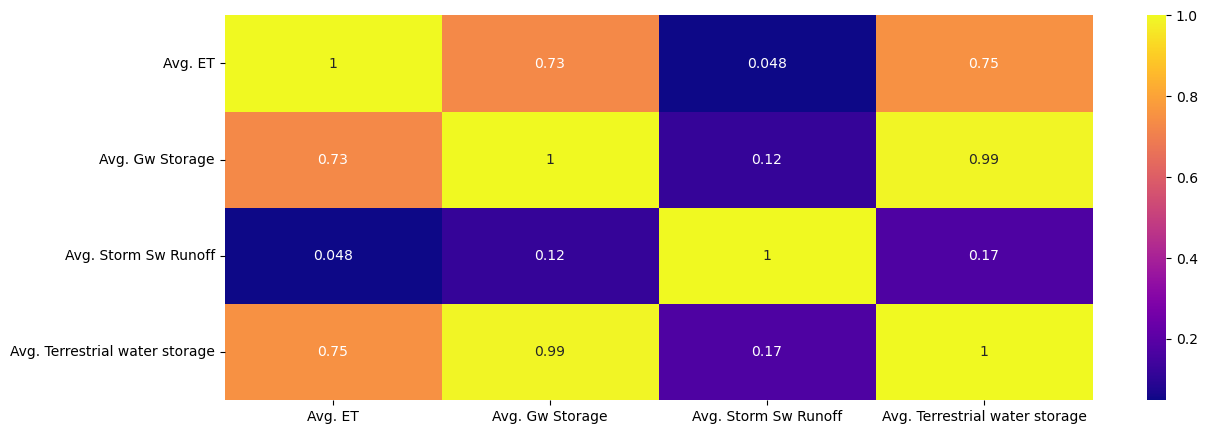

In [97]:
# Plotting the above correlation using a heatmap to further quantify the relationships
plt.figure(figsize=(14,5))
sb.heatmap(df_copy.corr(),cmap='plasma',annot=True)
plt.show()

**From the above we can see that there is a very strong correlation between the following variables**
1. Groundwater Storage & Terrestrial water Storage
2. Evapotranspiration & Groundwater Storage
3. Evapotranspiration & Terrestrial water Storage

#### **TIME SERIES PLOTS**

In [165]:
# plotting the timeseries plots of all the variables
#parameters = ['Avg. ET', 'Avg. Gw Storage','Avg. Storm Sw Runoff','Avg. Terrestrial water storage']
for param in parameters:
    fig = px.line(df_copy,y=param,title=f'Full Time Series for the parameter: {param}')
    fig.update_layout(
        font=dict(size=12, color='black'),
        autosize=False,
        width=1000,
        height=400
    )
    fig.show()

In [105]:
start_year = '2015'
end_year = '2017'
df_2y = df_copy.loc[start_year:end_year]
index_2y = df_2y.index

In [107]:
df_2015 = df_copy.loc['2015']

In [116]:
for param in parameters:
    fig1 = px.line(df_2015,x=df_2015.index,y=param,title=f'Time series plot for {param} for 2015')
    fig1.update_layout(
        font=dict(size=15, color='black')
        )
    fig1.show()

    fig2 = px.line(df_2y,x=index_2y,y=param,title=f'Time Series Plot for {param} from the year 2015 to 2017')
    fig2.update_layout(
        font=dict(size=15, color='black')
        )
    fig2.show()  


#### **CHECKING FOR STATIONARITY**

In [140]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
#parameters = ['Avg. ET', 'Avg. Gw Storage','Avg. Storm Sw Runoff','Avg. Terrestrial water storage']
def ADF_Test(param_name):
    adf_results = adfuller(df_copy[param_name],autolag='AIC')
    df_adf = pd.Series(adf_results[0:4], index=['Test Statistic','p-value','No. of Lags used','No. of data points used'])
    print('The ADF results are as follows:')
    print(df_adf)
    print()
    print('The critical values are as follows:')
    for key,val in adf_results[4].items():
        print(key,':',val)

def KPSS_Test(param_name):
    kpss_results = kpss(df_copy[param_name],'ct')
    df_kpss = pd.Series(kpss_results[0:3],index=['Test Statistic','p-value','No. of Lags used'])
    print(f'The results of the KPSS test is as follows: ')
    print(df_kpss)
    print()
    print('The critical values are as follows')
    for key,val in kpss_results[3].items():
        print(key,':',val)

1. **Average Evapotranspiration**

In [141]:
# adf test
ADF_Test(param_name='Avg. ET')

The ADF results are as follows:
Test Statistic            -1.043989e+01
p-value                    1.531735e-18
No. of Lags used           3.000000e+01
No. of data points used    4.898000e+03
dtype: float64

The critical values are as follows:
1% : -3.4316857963299587
5% : -2.8621302748271673
10% : -2.5670842044710875


In [142]:
# kpss test
KPSS_Test(param_name='Avg. ET')

The results of the KPSS test is as follows: 
Test Statistic       0.009806
p-value              0.100000
No. of Lags used    33.000000
dtype: float64

The critical values are as follows
10% : 0.119
5% : 0.146
2.5% : 0.176
1% : 0.216


c:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




Since from the KPSS test we can conclude that the time series for ET is **Stationary** & from the ADF test we can conclude that the time series for ET is **Non-Stationary**, we can conclude that the time series is not strictly stationary i.e., it is Trend stationary. To make it strictly stationary, the trend has to be removed and then stationarity analysis has to be done. 

2. **Average Groundwater Storage**

In [143]:
# adf test
ADF_Test(param_name='Avg. Gw Storage')

The ADF results are as follows:
Test Statistic            -1.077546e+01
p-value                    2.326023e-19
No. of Lags used           3.200000e+01
No. of data points used    4.896000e+03
dtype: float64

The critical values are as follows:
1% : -3.4316863422848876
5% : -2.8621305160249073
10% : -2.567084332870437


In [144]:
# kpss test
KPSS_Test(param_name='Avg. Gw Storage')

The results of the KPSS test is as follows: 
Test Statistic       0.006775
p-value              0.100000
No. of Lags used    33.000000
dtype: float64

The critical values are as follows
10% : 0.119
5% : 0.146
2.5% : 0.176
1% : 0.216


c:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




Here too the KPSS test is indicating that the time series for GW Storage is **Stationary** & the ADF test is indicating that =the time series for GW Storage is **Non-Stationary**, the time series is not strictly stationary i.e., it is Trend stationary. To make it strictly stationary, the trend has to be removed and then stationarity analysis has to be done. 

3. **Average Storm Surface Runoff**

In [145]:
# adf test
ADF_Test(param_name='Avg. Storm Sw Runoff')

The ADF results are as follows:
Test Statistic            -1.387335e+01
p-value                    6.404690e-26
No. of Lags used           1.500000e+01
No. of data points used    4.913000e+03
dtype: float64

The critical values are as follows:
1% : -3.4316817158437916
5% : -2.8621284721054474
10% : -2.5670832448093677


In [146]:
# kpss test
KPSS_Test(param_name='Avg. Storm Sw Runoff')

The results of the KPSS test is as follows: 
Test Statistic       0.060809
p-value              0.100000
No. of Lags used    26.000000
dtype: float64

The critical values are as follows
10% : 0.119
5% : 0.146
2.5% : 0.176
1% : 0.216


c:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




The Stationarity test of the variable Surface Water Runoff also is yeilding the same result, i.e., the time series is not strictly stationary i.e., it is Trend stationary.

4. **Terrestrial Water Storage**

In [147]:
# adf test
ADF_Test(param_name='Avg. Terrestrial water storage')

The ADF results are as follows:
Test Statistic            -1.119955e+01
p-value                    2.261797e-20
No. of Lags used           3.200000e+01
No. of data points used    4.896000e+03
dtype: float64

The critical values are as follows:
1% : -3.4316863422848876
5% : -2.8621305160249073
10% : -2.567084332870437


In [148]:
# kpss test
KPSS_Test(param_name='Avg. Terrestrial water storage')

The results of the KPSS test is as follows: 
Test Statistic       0.006764
p-value              0.100000
No. of Lags used    34.000000
dtype: float64

The critical values are as follows
10% : 0.119
5% : 0.146
2.5% : 0.176
1% : 0.216


c:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




The Stationarity test of the variable Terrestrial water storage also is yeilding the same result, i.e., the time series is not strictly stationary i.e., it is Trend stationary.

#### **DECOMPOSING THE TIME SERIES**

In [149]:
from statsmodels.tsa.seasonal import STL

#### **CHECKING THE AUTOCORRELATION**

**Lag Plots**

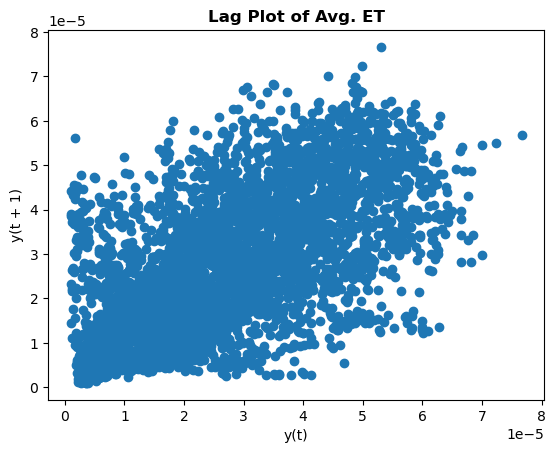

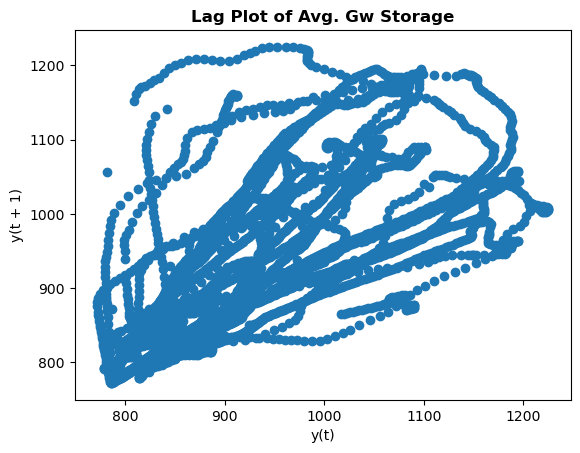

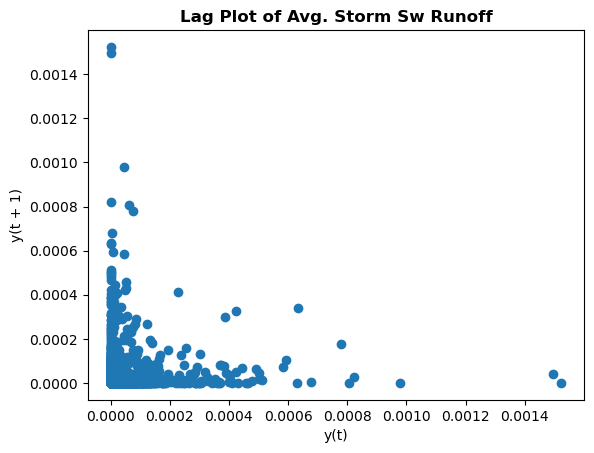

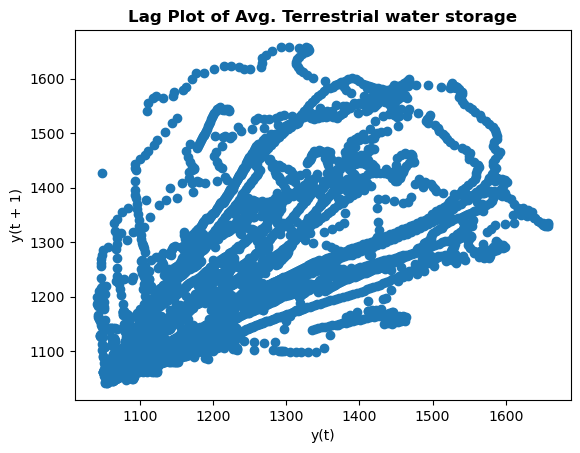

In [156]:
#parameters = ['Avg. ET', 'Avg. Gw Storage','Avg. Storm Sw Runoff','Avg. Terrestrial water storage']
for param in parameters:
    pd.plotting.lag_plot(df_copy[param],lag=1)
    plt.title(f'Lag Plot of {param}',fontweight='bold')
    plt.show()

**Autocorrelation plots**

1. **Average ET**

In [160]:
# resampling the data
resampled_ET = df_copy["2014":"2016"]["Avg. ET"].resample('M').mean()
resampled_ET[:5]

date
2014-01-31    0.000017
2014-02-28    0.000021
2014-03-31    0.000019
2014-04-30    0.000012
2014-05-31    0.000008
Freq: M, Name: Avg. ET, dtype: float64

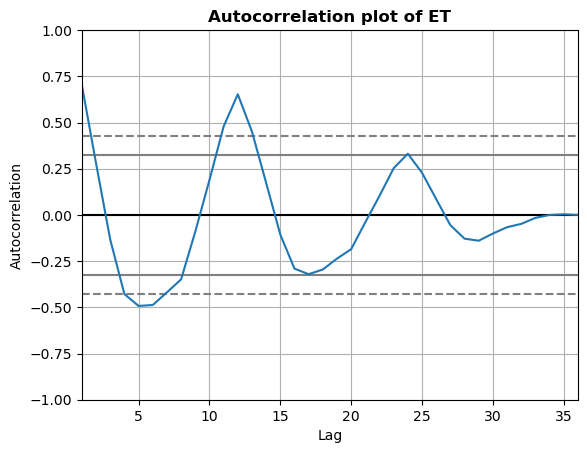

<Figure size 1200x300 with 0 Axes>

In [161]:
pd.plotting.autocorrelation_plot(resampled_ET)
plt.title("Autocorrelation plot of ET",fontweight='bold')
plt.figure(figsize=(12,3))
plt.show()

2. **Average Groundwater Storage**

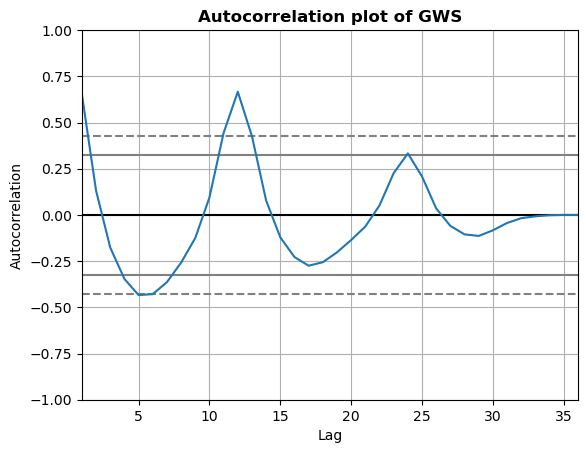

<Figure size 1200x300 with 0 Axes>

In [162]:
#parameters = ['Avg. ET', 'Avg. Gw Storage','Avg. Storm Sw Runoff','Avg. Terrestrial water storage']
resampled_GWS = df_copy["2014":"2016"]["Avg. Gw Storage"].resample('M').mean()
pd.plotting.autocorrelation_plot(resampled_GWS)
plt.title("Autocorrelation plot of GWS",fontweight='bold')
plt.figure(figsize=(12,3))
plt.show()

3. **Storm Water Runoff**

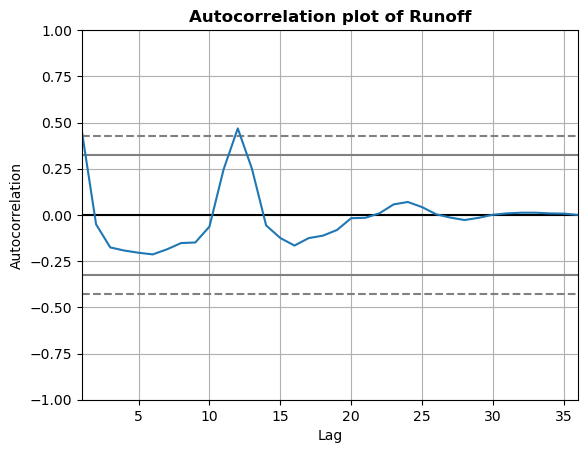

<Figure size 1200x300 with 0 Axes>

In [163]:
resampled_Runoff = df_copy["2014":"2016"]["Avg. Storm Sw Runoff"].resample('M').mean()
pd.plotting.autocorrelation_plot(resampled_Runoff)
plt.title("Autocorrelation plot of Runoff",fontweight='bold')
plt.figure(figsize=(12,3))
plt.show()

4. **Terrestrial Water Storage**

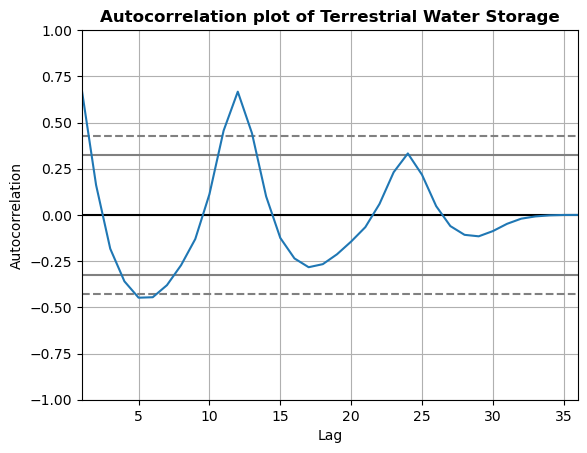

<Figure size 1200x300 with 0 Axes>

In [164]:
resampled_TWS = df_copy["2014":"2016"]["Avg. Terrestrial water storage"].resample('M').mean()
pd.plotting.autocorrelation_plot(resampled_TWS)
plt.title("Autocorrelation plot of Terrestrial Water Storage",fontweight='bold')
plt.figure(figsize=(12,3))
plt.show()